# Assignment 4 - The Bias coin Reloaded
Matteo Scialpi

## Introduction
**Suppose that we have a coin, and we would like to figure out what the probability is that it will flip up heads with frequency $f$. How should we estimate the bias $f$?**

## Question 1

**The Binomial distribution is a suitable likelihood function for this problem. Derive an estimator of the bias maximizing the likelihood function (Maximum Likelihood method).**

Using the same notation from the toss coin that we did in the first part of the course, we can write the number of heads in $N$ total throws as $n_H$. This $n_H$ will represent our datas, while $f$ is the parameter we are interested in. Following the hint given about a Binomial distribution for the likelihood, it will be
\begin{equation}
\mathscr{L}(f)=\mathcal{P}(n_H|f,N)=\binom{N}{n_h}f^{n_H}(1-f)^{N-n_H}\,.
\end{equation}
Taking its natural logarithm, we have the log-likelihood, given by
\begin{equation}
\mathcal{L}=\ln\mathscr{L}(f)=\ln{\binom{N}{n_H}}+n_H\,\ln{f}+(N-n_H)\,\ln{(1-f)}\,.
\end{equation}
We want to search the value for $f$ that maximises the log-likelihood, value that maximises the "linear" likelihood, too. Let's calculate the first $f$ derivative for $\mathscr{L}(f)$:
\begin{equation}
\frac{\partial\mathcal{L}}{\partial f}=\frac{n_H}{f}-\frac{N-n_H}{1-f}=\frac{n_H-Nf}{f(1-f)}\,.
\end{equation}
The derivative will be set to 0 because of the search for the $f$ maximum-likelihood value. This estimator for $f$ will be labelled as $\hat{f}$. We have
\begin{equation}
\frac{\partial\mathcal{L}}{\partial f}=0\qquad\implies\qquad\hat{f}=\frac{n_H}{N}\,,
\end{equation}
as we expected it to be by the simple frequency definition. Being the expectation value for the binomial distribution (taking the random variable $x=\{0,1\}$)
\begin{equation}
E[x]=Nf=n_H\,,
\end{equation} 
we can say that we can easily relate $\hat{f}$ to $E[x]$ as
\begin{equation}
\hat{f}=\frac{E[x]}{N}\,.
\end{equation}
For what concerns instead the error bar for $\hat{f}$, we have to calculate the second derivative with respect to $f$, strictly bound to the variance $\sigma_f^2$. It reads
\begin{equation}
\frac{\partial^2\mathcal{L}}{\partial f^2}=\frac{\partial}{\partial f}\biggl[\frac{n_H-Nf}{f(1-f)}\biggr]=-\frac{Nf^2-2n_Hf+n_H}{f^2\,(1-f)^2}\,.
\end{equation}
This second derivative is equal to
\begin{equation}
\frac{\partial^2\mathcal{L}}{\partial f^2}=-\frac{1}{\sigma_f^2},
\end{equation}
so we can write the errorbar for $f$ values
\begin{equation}
\sigma_f^2=\frac{f^2\,(1-f)^2}{Nf^2-2n_Hf+n_H}\,.
\end{equation}
In the end we can write the estimator for $f$ given by the maximum likelihood as
\begin{equation}
f=\hat{f}\pm\sigma_f=\hat{f}\pm\frac{\hat{f}\,(1-\hat{f})}{\sqrt{N\hat{f}^2-2n_H\hat{f}+n_H}}
\end{equation}
Substituting $\hat{f}$ derived before, we can write
\begin{equation}
f=\frac{n_H}{N}\pm\frac{\sqrt{n_H\,(1-n_H/N)}}{N}\,.
\end{equation}
We can also see that, restoring $\hat{f}$ in the expression, we have
\begin{equation}
\sigma_f^2=\frac{n_H\,(1-n_H/N)}{N^2}=\frac{\hat{f}\,(1-\hat{f})}{N}=\frac{\sigma^2}{N^2}\,,
\end{equation}
where $\sigma^2$ is the variance for the binomial distribution.

### Point A
**Generate $N$=100 coin flips with an input bias $f$ of your choice. What is the estimated value of $f$ and error bars?**

Bias estimate after 100 flips: f = 0.34 +/- 0.04737087712930804



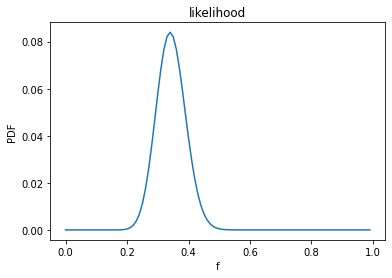

In [1]:
import numpy as np
import numpy.random as rnd
import scipy.special as sp
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as ss

def like(f,N,n_H):
  P=st.binom.pmf(n_H,N,f)
  return P

def lets_flip(f,N):
  flips=rnd.rand(N)
  flips=np.where(flips<=1.-f_bias,0,1)
  return flips

rnd.seed(1)

N=100
f_bias=1./3.
flips=lets_flip(f_bias,N)
n_H=0
for i in range(len(flips)):
  if flips[i]==1:
    n_H+=1
n_H=float(n_H)

par=st.binom.stats(N,n_H/N)
f=par[0]/float(N)
var=par[1]/float(N)**2.
print(f'Bias estimate after {N} flips: f = {f} +/- {np.sqrt(var)}')
print('')

x=np.arange(0.,1.,0.01)
l=like(x,N,n_H)
plt.plot(x,l)
plt.title('likelihood')
plt.xlabel('f')
plt.ylabel('PDF')
plt.show()

### Point B
**Given $N$=5 toss and 5 heads as outcome, what is the estimated value of $f$ and error bars?**

Foolwing definitions, we have that $\hat{f}=1$ and $\sigma_f^2=0$, due to the term $(1-\hat{f})$.

Bias estimate after 5 flips: f = 1.0 +/- 0.0



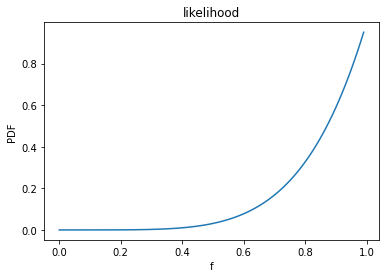

In [2]:
rnd.seed(1)

N=5
f_bias=1.
flips=lets_flip(f_bias,N)
n_H=0
for i in range(N):
  if flips[i]==1:
    n_H+=1
n_H=float(n_H)

par=st.binom.stats(N,float(n_H)/float(N))
f=par[0]/float(N)
var=par[1]/float(N)**2.

print(f'Bias estimate after {N} flips: f = {f} +/- {np.sqrt(var)}')
print('')
l=like(x,N,n_H)
plt.plot(x,l)
plt.title('likelihood')
plt.xlabel('f')
plt.ylabel('PDF')
plt.show()

### Point C
**Given the condition in *Point A* and then in *Point B*, try hypothesis testing with $H_0$ ("the coin is not biased") vs $H_1$ ("the coin is biased").**

This model comparison can be simply converted in "is $f=1/2$ or not"?. In a frequentist analysis we need a tool to understand how our repeated measurement's results are consistent with one particular model. We need to understand how much the obtained $\hat{f}$ is different from the expected $f_i$, taking into account the errorbar $\sigma_f$, too. We can use for this the following quantity $z$, given by
\begin{equation}
z=\frac{|f-f_i|}{\sigma_{f_i}}\,.
\end{equation}
We can see here that $z$ can be useful for our question because we can compare the measured $\hat{f}$ with the expected theoretical $f_i$, normalising this by $\sigma_{f_i}$. We can approach this problem simply substituting $f_0=1/2$. If $z\le2$, the measured $f$ is inside $2\sigma_{1/2}$ from $1/2$, so we can assume that $H_0$ is valid. If instead $z>2$, $H_0$ is not a good model and since $H_0$ and $H_1$ are complemantary, we can deduce that $H_1$ is valid. \
In both cases we can proceed showing $z$ value when $N$ increases. Firstly we have to calculate the likelihood for $f_i=1/2$ and an estimate for $\sigma_{1/2}$, which will be used as base for $H_0$. Later on we substitute our two conditions (POINT A and POINT B) to calculate $z$ as a function of $N$.

<ipython-input-3-e2c518161757>:35: RuntimeWarning: divide by zero encountered in double_scalars
  z[j,i]=np.linalg.norm(f_scipy_biased-f_scipy_unbiased)/np.sqrt(var_scipy_unbiased)
<ipython-input-3-e2c518161757>:35: RuntimeWarning: invalid value encountered in double_scalars
  z[j,i]=np.linalg.norm(f_scipy_biased-f_scipy_unbiased)/np.sqrt(var_scipy_unbiased)


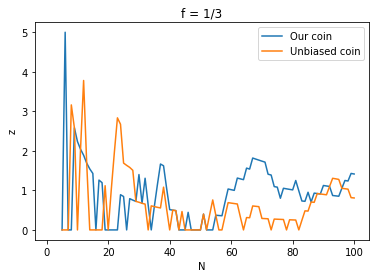

<ipython-input-3-e2c518161757>:35: RuntimeWarning: divide by zero encountered in double_scalars
  z[j,i]=np.linalg.norm(f_scipy_biased-f_scipy_unbiased)/np.sqrt(var_scipy_unbiased)
<ipython-input-3-e2c518161757>:35: RuntimeWarning: invalid value encountered in double_scalars
  z[j,i]=np.linalg.norm(f_scipy_biased-f_scipy_unbiased)/np.sqrt(var_scipy_unbiased)


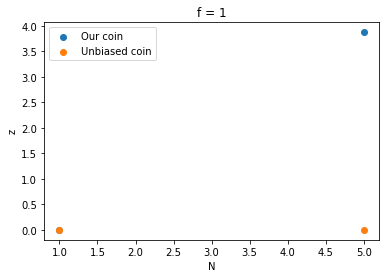

In [3]:
def zvalue(f_bias,N):
  f_bias=[f_bias,0.5]
  flips_biased=[[],[]]
  flips_unbiased=[]
  n_H_biased=[0,0]
  n_H_unbiased=0
  z=np.zeros([2,N],float)

  for i in range(1, N):
  
    w=rnd.rand()
    if w<=0.5:
      w=0
      flips_unbiased.append(w)
    elif w>0.5:
      w=1
      flips_unbiased.append(w)
      n_H_unbiased+=1
    r=rnd.rand(2)
    for j in range(len(f_bias)):
      if r[j]<=(1.-f_bias[j]):
        r[j]=0
        flips_biased[j].append(r[j])
      elif r[j]>(1.-f_bias[j]):
        r[j]=1
        flips_biased[j].append(r[j])
        n_H_biased[j]+=1
  
      par_biased=st.binom.stats(N,n_H_biased[j]/i)
      f_scipy_biased=par_biased[0]/float(i)
      par_unbiased=st.binom.stats(N,n_H_unbiased/i)
      f_scipy_unbiased=par_unbiased[0]/float(i)
      var_scipy_unbiased=par_unbiased[1]/float(i)**2.

      z[j,i]=np.linalg.norm(f_scipy_biased-f_scipy_unbiased)/np.sqrt(var_scipy_unbiased)
  return z

### N = 100
rnd.seed(1)
N=100
f_bias=1./3.
z=zvalue(f_bias,N)
x=np.arange(1,N+1,1)
plt.plot(x,z[0],label='Our coin')
plt.plot(x,z[1],label='Unbiased coin')
plt.xlabel('N')
plt.ylabel('z')
plt.title('f = 1/3')
plt.legend()
plt.show()

### N = 5 with 5 heads
rnd.seed(1)
N=5
f_bias=1.
z=zvalue(f_bias,N)
x=np.arange(1,N+1,1)
plt.scatter(x,z[0],label='Our coin')
plt.scatter(x,z[1],label='Unbiased coin')
plt.xlabel('N')
plt.ylabel('z')
plt.title('f = 1')
plt.legend()
plt.show()


For both those graph, $N=100$ and $N=5$ are too much low values to understand something. We can re-plot them with $N=10^3$.

<ipython-input-3-e2c518161757>:35: RuntimeWarning: divide by zero encountered in double_scalars
  z[j,i]=np.linalg.norm(f_scipy_biased-f_scipy_unbiased)/np.sqrt(var_scipy_unbiased)
<ipython-input-3-e2c518161757>:35: RuntimeWarning: invalid value encountered in double_scalars
  z[j,i]=np.linalg.norm(f_scipy_biased-f_scipy_unbiased)/np.sqrt(var_scipy_unbiased)


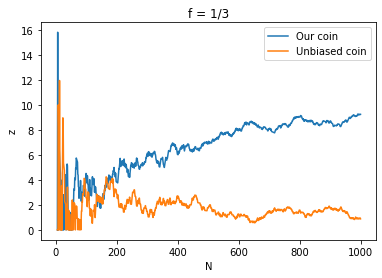

<ipython-input-3-e2c518161757>:35: RuntimeWarning: divide by zero encountered in double_scalars
  z[j,i]=np.linalg.norm(f_scipy_biased-f_scipy_unbiased)/np.sqrt(var_scipy_unbiased)
<ipython-input-3-e2c518161757>:35: RuntimeWarning: invalid value encountered in double_scalars
  z[j,i]=np.linalg.norm(f_scipy_biased-f_scipy_unbiased)/np.sqrt(var_scipy_unbiased)


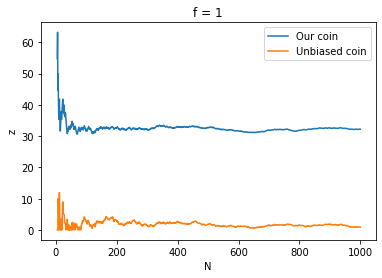

In [4]:
### N = 1000 with f = 0.3
rnd.seed(1)
N=1000
f_bias=1./3.
z=zvalue(f_bias,N)
x=np.arange(1,N+1,1)
plt.plot(x,z[0],label='Our coin')
plt.plot(x,z[1],label='Unbiased coin')
plt.xlabel('N')
plt.ylabel('z')
plt.title('f = 1/3')
plt.legend()
plt.show()

### N = 1000 with 1000 heads
rnd.seed(1)
N=1000
f_bias=1.
z=zvalue(f_bias,N)
x=np.arange(1,N+1,1)
plt.plot(x,z[0],label='Our coin')
plt.plot(x,z[1],label='Unbiased coin')
plt.xlabel('N')
plt.ylabel('z')
plt.title('f = 1')
plt.legend()
plt.show()


Here we clarly see that our coin behaves really different from an umbiased one. We can conclude that $H_1$ is valid, since $H_0$ is not.

## Question 2
**The Binomial distribution is a suitable likelihood function for this problem. Use as "conjugate prior" the Beta Distribution. Derive an estimator of the bias maximizing the posterior function (Maximum A Posteriori method).**

What we want to determine is first the posterior probability for $f$ given $n_H$ heads in $N$ flips. Then we will search the $f$ value that maximises this posterior probability. In doing this we have to consider different times priors that are suitable to do analytical integrals. \
We can start from the Bayes theorem to calculate the probability mentioned above:
\begin{equation}
\mathcal{P}(f|n_H,N)=\frac{\mathcal{P}(n_H|f,N)\,\mathcal{P}(f)}{\mathcal{P}(n_H|N)}\,.
\end{equation}
We can divide the study in three terms.
* $\mathcal{P}(n_H|f,N)$ is the likelihood, which the hint sets as a Binomial distribution:
\begin{equation}
\mathcal{P}(n_H|f,N)=\binom{N}{n_h}f^{n_H}(1-f)^{N-n_H}\,.
\end{equation}
* $\mathcal{P}(f)$ is the prior probability for $f$. We want here to set a prior suitable to do analytical integrals. In this case this can be done via the Beta Distribution, given by
\begin{equation}
\mathcal{P}(f|\alpha)=\frac{f^{\alpha-1}\,(1-f)^{\alpha-1}}{B(\alpha)}\,,
\end{equation}
where $B(\alpha)$ is the Beta Function, a normalization constant given by
\begin{equation}
B(\alpha)=\int_0^1x^{\alpha-1}(1-x)^{\alpha-1}dx\,.
\end{equation}
We can ask urselves how informative can be this prior. In principle it depens on $\alpha$, but, as we can see from the code below this point, this distribution has a peak exactly at $f=1/2$. Changing $\alpha$ only changes the width of the peak. In particular for $\alpha=1$ we have a non-informative prior.
* $\mathcal{P}(n_H|N)$ is the evidence, which can be marginalized over $f$ values. Anyway it is only a normalisation constant and we want to focus on the prior influence. \

We can say by those reasons that
\begin{equation}
\begin{split}
\mathcal{P}(f|n_H,N)&\propto\mathcal{P}(n_H|f,N)\,\mathcal{P}(f)\\
&\propto f^{n_H+\alpha-1}(1-f)^{N-n_H+\alpha-1}\\
&\equiv \text{Binomial}(n_H+\alpha-1;N+2\alpha-2, f)\,.
\end{split}
\end{equation}
The posterior is a Binomial distribution with $n'_H=n_H+\alpha-1$ and $N'=N+2\alpha-2$. Looking for the value for $f$ that maximises this posterior, we derived in the first question that $\hat{f}$ for a Binomial distribution is given by
\begin{equation}
\hat{f}=\frac{E[x]}{N'}=\frac{n'_H}{N'}=\frac{n_H+\alpha-1}{N+2\alpha-2}\,.
\end{equation}
Its errorbar is instead the squared root of
\begin{equation}
\sigma_f^2=\frac{n'_H\,(1-n'_H/N')}{N'^{\,2}}=\frac{\hat{f}\,(1-\hat{f})}{N'}=\frac{\sigma^2}{N'^{\,2}}\,.
\end{equation}

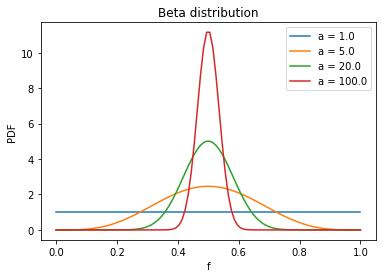

In [5]:
alpha=np.array([1.,5.,20.,100.])
for i in range(len(alpha)):
  x = np.linspace(st.beta.ppf(0., alpha[i], alpha[i]), st.beta.ppf(1., alpha[i], alpha[i]), 100)
  plt.plot(x, st.beta.pdf(x, alpha[i], alpha[i]), label=f'a = {alpha[i]}')
plt.title('Beta distribution')
plt.xlabel('f')
plt.ylabel('PDF')
plt.legend()
plt.show()

### Point A
**Generate $N$=100 coin flips with an input bias $f$ of your choice. What is the estimated value of $f$ and error bars?**

In this code here below I considered both the case for an uninformative prior ($\alpha=1$) and for an informative prior ($\alpha>1$). We can crearly see from formulas in the previous section that for $\alpha=1$ case we expect $n'_H=n_H$ and $N'=N$, where nothing changes from the frequentist $\hat{f}$ and $\sigma_f^2$. With $\alpha>1$ instead we expect things to fix. \
With only 100 flips, we have to take pay attention to the value of $\alpha$. If it is too high, the prior becomes too much informative to have good results ("good results", given that we know the intrinsic value of $f$, set to generate the flips). This thing will be corrected flipping the coin more and more times (Point D).

The coin is flipped 100 times with an intrinsic bias f = 0.3333333333333333

Theoretical values from above formulas:
alpha = 1.0; estimator for f = 0.3269230769230769 +/- 0.04599794923294709
alpha = 5.0; estimator for f = 0.3392857142857143 +/- 0.04473841813085608
alpha = 20.0; estimator for f = 0.3732394366197183 +/- 0.040588258863196766
alpha = 100.0; estimator for f = 0.44039735099337746 +/- 0.028566613462917043


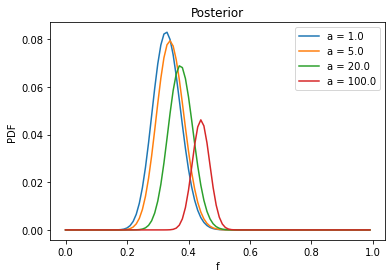

In [6]:
N=100
f_bias=1./3.
rnd.seed(1)
flips=lets_flip(f_bias,N)
print(f'The coin is flipped {N} times with an intrinsic bias f = {f_bias}')
print('')
n_H=0
for i in range(len(flips)):
  if flips[i]==1:
    n_H+=1
n_H=float(n_H)

n_H_prime=n_H+alpha-1.
N_prime=float(N)+2.*alpha+2.
f_theo_alpha=n_H_prime/N_prime
sigma_theo_alpha=np.sqrt(n_H_prime*(1.-f_theo_alpha)/(N_prime*N_prime))
print('Theoretical values from above formulas:')
for i in range(len(alpha)):
  print(f'alpha = {alpha[i]}; estimator for f = {f_theo_alpha[i]} +/- {sigma_theo_alpha[i]}')

### NEWTON RAPHSON FOR MAXIMUM POSTERIOR
x=np.arange(0.,1.,0.01)
post_alpha=[]

for i in range(len(alpha)):
  post_alpha.append(like(x,N_prime[i],n_H_prime[i]))           #Despite the python function is called "like", it has a binomial in it, so I will use this for the posterior
  plt.plot(x, post_alpha[i], label=f'a = {alpha[i]}')
post_alpha=np.array(post_alpha)
plt.title('Posterior')
plt.xlabel('f')
plt.ylabel('PDF')
plt.legend()
plt.show()


### Point B
**Given $N$=5 toss and 5 heads as outcome what is the estimated value of f and error bars?**

Here, we expect $\hat{f}=1$, but with $N=5$ prior is still quite informative, so we expect different results depending on $\alpha$.

alpha = 1.0; estimator for f = 0.5555555555555556 +/- 0.04599794923294709
alpha = 5.0; estimator for f = 0.5294117647058824 +/- 0.04473841813085608
alpha = 20.0; estimator for f = 0.5106382978723404 +/- 0.040588258863196766
alpha = 100.0; estimator for f = 0.5024154589371981 +/- 0.028566613462917043


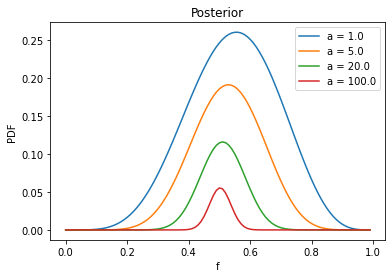

In [7]:
### PROBLEM SETTINGS AND THROWS
N=5
f_bias=1.
flips_alpha=lets_flip(f_bias,N)
n_H=0
for i in range(N):
  if flips_alpha[i]==1:
    n_H+=1
n_H=float(n_H)

n_H_prime=n_H+alpha-1.
N_prime=float(N)+2.*alpha+2.
par_alpha=st.binom.stats(N_prime,n_H_prime/N_prime)
f_theo_alpha=par_alpha[0]/N_prime
var_theo_alpha=par_alpha[1]/(N_prime*N_prime)
for i in range(len(alpha)):
  print(f'alpha = {alpha[i]}; estimator for f = {f_theo_alpha[i]} +/- {sigma_theo_alpha[i]}')

post_alpha=[]
f_nr_alpha=[]
for i in range(len(alpha)):
  post_alpha.append(like(x,N_prime[i],n_H_prime[i]))           #Despite the python function is called "like", it has a binomial in it, so I will use this for the posterior
  plt.plot(x, post_alpha[i], label=f'a = {alpha[i]}')
post_alpha=np.array(post_alpha)
plt.title('Posterior')
plt.xlabel('f')
plt.ylabel('PDF')
plt.legend()
plt.show()

### Point C
**Given the condition in *Point A* and then in *Point B*, compare $H_0$ ("the coin is not biased") vs $H_1$ ("the coin is biased") models.**

The difference with the frequentist approach is that we can now calculate the relative goodness between probability of having model $H_0$ (null hypothesis) and model $H_1$. This odds ratio $O_{01}$ is given by
\begin{equation}
O_{01}=\frac{\mathcal{P}(H_0|n_H,N)}{\mathcal{P}(H_1|n_H,N)}\,,
\end{equation}
where the number of heads $n_H$ represents data. Using for both the numerator and the denominator the Bayes theorem, we have
\begin{equation}
\begin{split}
O_{01}&=\frac{\mathcal{P}(n_H|H_0,N)\,\mathcal{P}(H_0|N)}{\mathcal{P}(n_H|N)}\frac{\mathcal{P}(n_H|N)}{\mathcal{P}(n_H|H_1,N)\,\mathcal{P}(H_1|N)}\\
&=\frac{\mathcal{P}(n_H|H_0,N)}{\mathcal{P}(n_H|H_1,N)}\frac{\mathcal{P}(H_0|N)}{\mathcal{P}(H_1|N)}\,.
\end{split}
\end{equation}
Supposing a uniform prior for $H_0$ and $H_1$, that means
\begin{equation}
\mathcal{P}(H_0|N)=\mathcal{P}(H_1|N)=\frac{1}{2}\,,
\end{equation}
we are left with
\begin{equation}
O_{01}=B_{01}=\frac{\mathcal{P}(n_H|H_0,N)}{\mathcal{P}(n_H|H_1,N)}\,.
\end{equation}
For both these likelihood, we have to marginalise over all possible $f$ values. The general marginalisation for model $H_i$ is given by
\begin{equation}
\mathcal{P}(n_H|H_i,N)=\int_0^1df\,\mathcal{P}(n_H|H_i,f,N)\,\mathcal{P}(f|H_i,N)\,,
\end{equation}
were $\mathcal{P}(n_H|H_i,f,N)$ is our usual Binomial likelihood
\begin{equation}
\mathcal{P}(n_H|H_i,f,N)=\binom{N}{n_H}f^{n_H}(1-f)^{N-n_H}\,.
\end{equation}
Let's analyse them separately.
* $H_0$ asks $f=1/2$, so we can say for the prior probability that
\begin{equation}
\mathcal{P}(f|H_0,N)=\delta\Bigl(f-\frac{1}{2}\Bigr)\,.
\end{equation}
Therefore we have
\begin{equation}
\begin{split}
\mathcal{P}(n_H|H_0,N)&=\int_0^1df\,\mathcal{P}(n_H|H_0,f,N)\,\delta\Bigl(f-\frac{1}{2}\Bigr)\\
&=\int_0^1df\,\binom{N}{n_H}\,f^{n_H}\,(1-f)^{N-n_H}\,\delta\Bigl(f-\frac{1}{2}\Bigr)\\
&=\binom{N}{n_H}\frac{1}{2^{N}}
\end{split}\,.
\end{equation}
* For what concerns instead $H_1$, we have to consider the Beta prior chosen ad hoc to do this integral. We have
\begin{equation}
\begin{split}
\mathcal{P}(n_H|H_1,N)&=\int_0^1df\,\binom{N}{n_H}f^{n_H}(1-f)^{N-n_H}\,\frac{f^{\alpha-1}(1-f)^{\alpha-1}}{B(\alpha)}\\
&=\binom{N}{n_H}\frac{1}{B(\alpha)}\int_0^1df\,f^{n_H+\alpha-1}(1-f)^{N-n_H+\alpha-1}\\
&=\binom{N}{n_H}\frac{1}{B(\alpha)}\frac{(n_H+\alpha-1)!\,(N-n_H+\alpha-1)!}{(N+2\alpha-1)!}\,.
\end{split}
\end{equation}

Substituting in $O_{01}$, we have
\begin{equation}
\begin{split}
O_{01}&=\frac{(N+2\alpha-1)!}{(n_H+\alpha-1)!\,(N-n_H+\alpha-1)!}\frac{B(\alpha)}{2^N}\\
&=\binom{N+2\alpha-2}{n_H+\alpha-1}\frac{B(\alpha)}{(N+2\alpha-2)\,2^N}\\
&=\binom{N'}{n'_H}\frac{B(\alpha)}{N'\,2^N}
\end{split}\,.
\end{equation}
Note that this depends only on $N$ and on $\alpha$, where for an uninformative prior ($\alpha=1$) we have
\begin{equation}
O_{01,\,\alpha=1}=\binom{N}{n_H}\frac{1}{N\,2^N}\,.
\end{equation}

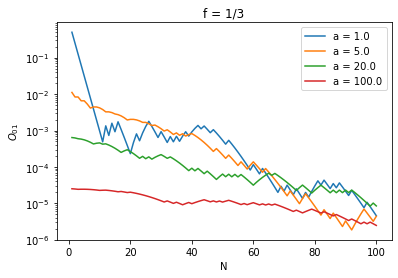

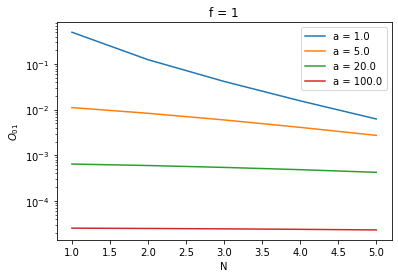

In [8]:
def odds(f_bias,N,alpha):
  O_01=np.zeros([len(alpha),N],float)
  for i in range(len(alpha)):
    flips=[]
    n_H=0
    for j in range(N):
      r=rnd.rand()
      if r<=(1.-f_bias):
        r=0
        flips.append(r)
      elif r>(1.-f_bias):
        r=1
        flips.append(r)
        n_H+=1
      n_H_prime=n_H+alpha[i]-1.
      N_prime=(j+1.)+2.*alpha[i]-2.
      O_01[i,j]=ss.comb(N_prime,n_H_prime)*ss.beta(alpha[i],alpha[i])/(N_prime*2.**(j+1.))
  return O_01

rnd.seed(1)
N=100
f_bias=1./3.
x=np.arange(1,N+1,1)
O_01=odds(f_bias,N,alpha)
for i in range(len(alpha)):
  plt.plot(x, O_01[i], label=f'a = {alpha[i]}')
plt.legend()
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('$O_{01}$')
plt.title('f = 1/3')
plt.show()

rnd.seed(1)
N=5
f_bias=1.
x=np.arange(1,N+1,1)
O_01=odds(f_bias,N,alpha)
for i in range(len(alpha)):
  plt.plot(x, O_01[i], label=f'a = {alpha[i]}')
plt.legend()
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('$O_{01}$')
plt.title('f = 1')
plt.show()

Here we clearly see that $O_{01}\ll1$, already with a low value for $N$. This means that $H_1$ is the most probable model between the two.

### Point D
**What happens to the MAP estimator when $N\rightarrow+\infty$?**

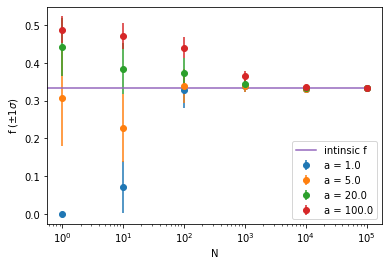

In [9]:
N=np.array([1,10,100,1000,10000,100000])
x=np.arange(0.,1.,0.01)
f_bias=1./3.
f_theo_alpha_array=[[],[],[],[]]
sigma_theo_alpha_array=[[],[],[],[]]

for w in range(len(alpha)):
  for j in range(len(N)):
    rnd.seed(1)
    flips=lets_flip(f_bias,N[j])
    n_H=0
    for i in range(len(flips)):
      if flips[i]==1:
        n_H+=1
    n_H=float(n_H)
    n_H_prime=n_H+alpha[w]-1.
    N_prime=float(N[j])+2.*alpha[w]+2.
    f_theo_alpha=n_H_prime/N_prime
    sigma_theo_alpha=np.sqrt(n_H_prime*(1.-f_theo_alpha)/(N_prime*N_prime))
    f_theo_alpha_array[w].append(f_theo_alpha)
    sigma_theo_alpha_array[w].append(sigma_theo_alpha)
  plt.errorbar(N, f_theo_alpha_array[w], xerr=None, yerr=sigma_theo_alpha_array[w], fmt='o', label=f'a = {alpha[w]}')
f_plot=np.array([[0.,100000.],[f_bias,f_bias]])
plt.plot(f_plot[0],f_plot[1],label='intinsic f')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('f ($\pm1\sigma$)')
plt.legend()
plt.show()
  

Here we clearly see that the expected value $\hat{f}$ reaches the exact intrinsic value when $N$ is sufficiently high. Increasing N, we can say that $n_H$ increases accordingly, so we can say for the main formula
\begin{equation}
\hat{f}=\frac{n_H+\alpha-1}{N+2\alpha-2}\rightarrow\frac{n_H}{N}\,,
\end{equation}
where $\alpha$ is constant. This is coherent with the postulate which says that the more data we have the more uninformative the prior is.

## Question 3
**Use Cobaya (or your preferred MCMC code) to infer the bias parameter, error bars and model testing**

## Question 4 - The seven scientists

**$N$ datapoints $\{x_n\}$ are drawn from $N$ distributions, all of which are Gaussian with a common mean $\mu$ but with different unknown standard deviation $\sigma_n$. What are the maximum likelihood parameters $\mu$, $\{\sigma_n\}$ given the data? For example, seven scientists (A, B, C, D, E, F, G) with wildly-differing experimental skills measue $\mu$. You expect some of them to do accurate work (i.e., to have small $\sigma_n$) and some of them to turn in wildly inaccurate answers (i.e., to have enormous $\sigma_n$). The table here below shows their seven results. What is $\mu$ and how reliable is each scientist?** \
**I hope you agree that, intuitively, it looks pretty certain that A and B are both inept measurers, that D-G are better and that the true value of $\mu$ is somewhere close to $10$. But what does maximizing the likelihood tell you?**

|Scientist|$x_n$|
|:-:|:-:|
|A|-27.020|
|B|3.570|
|C|8.191|
|D|9.898|
|E|9.603|
|F|9.945|
|G|10.056|

As the text says, we have a superposition of different Gaussian distributions with the same $\mu$, but with different $\sigma_n$. What we are searching for are two estimator for both $\mu$ and $\sigma_n$. The likelihood for our problem is a product of indiviual Gaussians:
\begin{equation}
\begin{split}
\mathscr{L}(\mu,\{\sigma_n\})&=\mathcal{P}(\{x_n\}|\mu,\{\sigma_n\})\\
&=\prod_{n=1}^N\mathcal{P}(x_n|\mu,\sigma_n)\\
&=\prod_{n=1}^N\frac{1}{\sqrt{2\pi\,\sigma_n^2}}\,e^{-(x_n-\mu)^2/2\sigma_n^2}
\end{split}\,,
\end{equation}
supposing that every Gaussian has the same prior probability. The log-likelihood $\mathcal{L}$ that we want to maximize is given by
\begin{equation}
\begin{split}
\mathcal{L}=\ln{\mathscr{L}}&=\sum_{n=1}^N\,\ln{\Biggl[\frac{1}{\sqrt{2\pi\,\sigma_n^2}}\,e^{-(x_n-\mu)^2/2\sigma_n^2}\Biggr]}\\
&=\sum_{n=1}^N\biggl[-\frac{1}{2}\,\ln{2\pi}-\ln{\sigma_n}-\frac{(x_n-\mu)^2}{2\sigma_n^2}\biggr]
\end{split}\,.
\end{equation}
To find an estimator for the single $\sigma_n$ we can derive the single term inside the sum, given by
\begin{equation}
\frac{\partial}{\partial\sigma_n}\biggl[-\frac{1}{2}\,\ln{2\pi}-\ln{\sigma_n}-\frac{(x_n-\mu)^2}{2\sigma_n^2}\biggr]=-\frac{1}{\sigma_n}+\frac{(x-\mu)^2}{\sigma_n^3}\,.
\end{equation}
This must be equal to zero to find the maximum and so
\begin{equation}
\frac{\partial}{\partial\sigma_n}\biggl[-\frac{1}{2}\,\ln{2\pi}-\ln{\sigma_n}-\frac{(x_n-\mu)^2}{2\sigma_n^2}\biggr]=0\implies\hat{\sigma}_n=|x_n-\mu|\,.
\end{equation}
We have now an estimator for $\sigma_n$ depending on the corresponding $n$-result $x_n$. We have still to search for the $\mu$ value that maximises $\mathscr{L}$ (and so $\mathcal{L}$). Let's derive $\mathcal{L}$ wrt $\mu$:
\begin{equation}
\frac{\partial\mathcal{L}}{\partial\mu}=\sum_{n=1}^N\frac{\partial}{\partial\mu}\biggl[-\frac{1}{2}\,\ln{2\pi}-\ln{\sigma_n}-\frac{(x_n-\mu)^2}{2\sigma_n^2}\biggr]=\sum_{n=1}^N\frac{x_n-\mu}{\sigma_n^{2}}\,.
\end{equation}
Considering that for a fixed $n$ we have just estimated the value for $\hat{\sigma}_n$, we can substitute and take the derivative equal to $0$:
\begin{equation}
\frac{\partial\mathcal{L}}{\partial\mu}=\sum_{n=1}^N\frac{1}{x_n-\mu}=0\,.
\end{equation}
This must be solved via the Newton-Raphson method, which is implemented here below.

mu = [-27.02    3.57    8.191   9.898   9.898   9.945]
standard deviation:
                           x = -27.02      x = 3.57  x = 8.191     x = 9.898  \
mu = -27.01999999999995  4.973799e-14  3.059000e+01     35.211  3.691800e+01   
mu = 3.57000000000005    3.059000e+01  5.018208e-14      4.621  6.328000e+00   
mu = 8.191               3.521100e+01  4.621000e+00      0.000  1.707000e+00   
mu = 9.898000000000012   3.691800e+01  6.328000e+00      1.707  1.243450e-14   
mu = 9.898000000003284   3.691800e+01  6.328000e+00      1.707  3.284484e-12   
mu = 9.945               3.696500e+01  6.375000e+00      1.754  4.700000e-02   

                         x = 9.603  x = 9.945  x = 10.056  
mu = -27.01999999999995     36.623     36.965      37.076  
mu = 3.57000000000005        6.033      6.375       6.486  
mu = 8.191                   1.412      1.754       1.865  
mu = 9.898000000000012       0.295      0.047       0.158  
mu = 9.898000000003284       0.295      0.047       0.158  
mu =

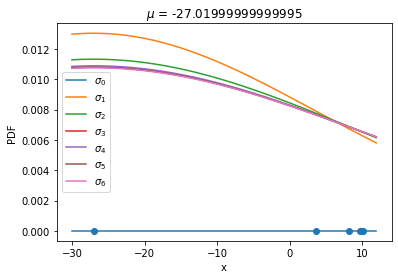

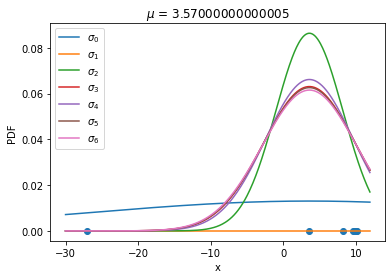

/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


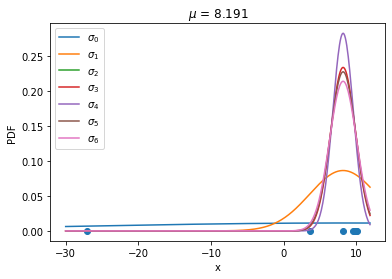

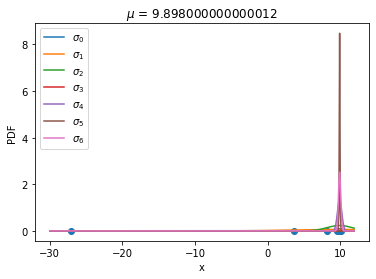

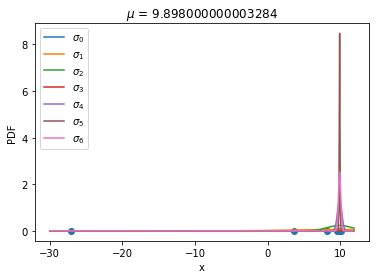

/usr/local/lib/python3.8/dist-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


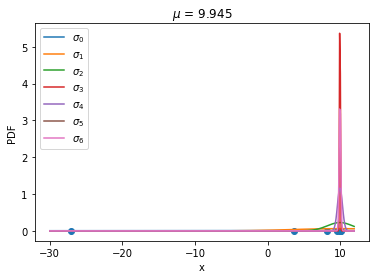

In [10]:
import pandas as pd

def like_seven(x,mu,sigma):
  P=st.norm.pdf(x,loc=mu,scale=sigma)
  return P

def f(x,mu):
  r=0.
  for i in range(len(x)):
    r+=1./(mu-x[i])
  return r

def der(x,mu):
  r=0.
  for i in range(len(x)):
    r+=1./(x[i]-mu)**2.
  return r

eps=1e-6
x=np.array([-27.020,3.570,8.191,9.898,9.603,9.945,10.056])
mu=np.array([-25.,4.,8.50,9.7,9.92,10.])
for j in range(len(mu)):
  mu_old=30.
  while np.linalg.norm(mu[j]-mu_old)>=eps:
    mu_old=np.copy(mu[j])
    mu[j]-=f(x,mu[j])/der(x,mu[j])
print('mu =',mu)

sigma=np.zeros([len(mu),len(x)])
for i in range(len(mu)):
  for j in range(len(x)):
    sigma[i,j]=np.linalg.norm(x[j]-mu[i])

sigma2=np.copy(sigma)
sigma=pd.DataFrame(sigma, columns=[f'x = {x[0]}', f'x = {x[1]}', f'x = {x[2]}', f'x = {x[3]}', f'x = {x[4]}', f'x = {x[5]}', f'x = {x[6]}'], index=[f'mu = {mu[0]}', f'mu = {mu[1]}', f'mu = {mu[2]}', f'mu = {mu[3]}', f'mu = {mu[4]}', f'mu = {mu[5]}'])
xplot=np.arange(-30.,12.,0.1)

print('standard deviation:')
print(sigma)

for i in range(len(mu)):
  for j in range(len(x)):
    plt.plot(xplot, like_seven(xplot,mu[i],sigma[f'x = {x[j]}'][f'mu = {mu[i]}']),label=f'$\sigma_{j}$')
  plt.legend()
  plt.scatter(x, np.zeros(len(x),float),label='data points')
  plt.title(f'$\mu$ = {mu[i]}')
  plt.xlabel('x')
  plt.ylabel('PDF')
  plt.show()

Since $\partial\mathcal{L}/\partial\mu$ is a sixth order polynomial, there are six different solutions for $\mu$, which I reported in the first output of the code. We can see that for $\mu=3.57$ results are better, considering standard deviation, too. 